In [52]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Homework 6A: Sampling
## Due Monday, July 8th, 11:59 PM PT

You must submit this assignment to Gradescope by the on-time deadline, Monday, July 8th, 11:59 PM PT. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. While course staff is happy to help you if you encounter difficulties with submission, we may not be able to respond to late-night requests for assistance (TAs need to sleep, after all!). **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to contact staff for submission support. 

This is part of a two-part assignment. After completing this part (Homework 6A), please submit the generated zip file to the Homework 6A Coding assignment on Gradescope. Gradescope will automatically submit a PDF of your written responses to the HW 6A Written assignment; there is no need to submit it manually. **Note that you will have to submit HW 6B manually and assign pages accordingly.**

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## This Assignment

The purpose of this assignment is for you to understand the process of sampling, including convenience samples, random samples, as well as sampling biases. We will also practice drawing samples from a categorical distribution using `NumPy`.

## Score Breakdown
Question | Manual? | Points
--- | --- | --
1ai | No | 1
1aii | No | 1
1aiii | No | 1
1bi | No | 1
1bii | No | 1
1biii | No | 1
1biv | No | 1
2a | No | 2
2b | Yes | 2
2c | Yes | 3
2d | Yes | 2
Total | 3 | 16


## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question.

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests on Gradescope after the grades are released.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.

### Debugging Guide

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Datahub, Gradescope, common `pandas` and RegEx errors, and visualizations.

### Initialize your environment

In [53]:
import numpy as np
np.random.seed(200)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Data 100 Cutest Pets Contest

Welcome to the Data 100 Cutest Pets Contest, Summer 2024 edition! Course staff nominate their pets to participate in this contest. Students will vote on the cutest one among the nominations in the final exam.

The nominees are:

<img src='images/momo.jpg' width="180px" /> <img src='images/allie.jpg' width="180px" /> <img src='images/mitski.jpg' width="180px" /> 

(From left to right) **Momo** (Maya's cat), **Allie** (Angela's cat), and **Mitski** (Jacob's cat).

Course staff would like to predict the results for the official survey later in the semester by surveying students in the class now. This process is similar to polling that occurs before a political election.

In this section, you are going to explore different sampling methods.
<br/><br/>

<hr style="border: 1px solid #fdb515;" />

## Question 1

<br>

---

### Question 1a

Since his cat, Mitski, is nominated, Jacob would like to understand the class opinion before the contest. This coming week, he decided to survey all students enrolled in Data 100 this semester (Summer 2024) by sending out an Ed announcement via email that asked students to choose the cutest from the three pets. You may assume no other students/users receive the survey. Jacob closes the survey 12 hours after sending it out.

You can assume that all, and only, enrolled students in Summer 2024 are on Ed.

#### Question 1a, Part i
In Jacob's survey, which of the following is the population of interest? Assign your answer choice to `q1ai` (e.g., `'A'`, `'B'`, etc.).

**Note**: The public autograder tests for this question, and for the other multiple choice questions in this assignment, will only check that your answer is in the correct format. **The public tests will not check that you have chosen the correct answer.**

A. All UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Summer 2024 and previous)</br>
C. All students enrolled in Data 100 for this semester (Summer 2024)<br/>
D. All students who fill out Jacob's survey

In [54]:
q1ai = "C"

In [55]:
grader.check("q1ai")

q1ai results: All test cases passed!

#### Question 1a, Part ii
In Jacob's survey, which of the following is the sampling frame? Assign your answer choice to `q1aii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Summer 2024 and previous)</br>
C. All students enrolled in Data 100 for this semester (Summer 2024)<br/>
D. All students who fill out Jacob's survey

In [56]:
q1aii = "C"

In [57]:
grader.check("q1aii")

q1aii results: All test cases passed!

#### Question 1a, Part iii

Which of the following is the sample? Assign your answer choice to `q1aiii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Summer 2024 and previous)</br>
C. All students enrolled in Data 100 for this semester (Summer 2024)<br/>
D. All students who fill out Jacob's survey

In [58]:
q1aiii = "D"

In [59]:
grader.check("q1aiii")

q1aiii results: All test cases passed!

<br><br>

---

### Question 1b

In practice, we cannot get a 100\% survey response rate, often because our population is too large, or because there is a time limit. In this case, very few students answered Jacob's survey before he closed it.

To get more data to predict the answer to the original question ("Which pet will win the Data 100 Cutest Pet Contest?"), Jacob decides on a different strategy: **he conducts the pre-contest survey in person in his discussion section that same week**. He then asks every student who attends the discussion that week for their opinion on the cutest of the three pets, by presenting the following slide: 

<img src='images/survey.png' width="600px" />

#### Question 1b, Part i
In this sampling scheme, which of the following is the population of interest? Assign your answer choice to `q1bi` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Summer 2024 and previous)</br>
C. All students enrolled in Data 100 for this semester (Summer 2024)<br/>
D. All students enrolled in Jacob's discussion section<br/>
E. All students who fill out Jacob's pre-contest survey

In [60]:
q1bi = "C"

In [61]:
grader.check("q1bi")

q1bi results: All test cases passed!

#### Question 1b, Part ii
In this sampling scheme, which of the following is the sampling frame? Assign your answer choice to `q1bii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Summer 2024 and previous)</br>
C. All students enrolled in Data 100 for this semester (Summer 2024)<br/>
D. All students enrolled in Jacob's discussion section<br/>
E. All students who fill out Jacob's pre-contest survey

In [62]:
q1bii = "D"

In [63]:
grader.check("q1bii")

q1bii results: All test cases passed!

#### Question 1b, Part iii
Which of the following is the sample? Assign your answer choice to `q1biii` (e.g., `'A'`, `'B'`, etc.).

A. UC Berkeley students<br/>
B. All students enrolled in Data 100 across all semesters (Summer 2024 and previous)</br>
C. All students enrolled in Data 100 for this semester (Summer 2024)<br/>
D. All students enrolled in Jacob's discussion section<br/>
E. All students who fill out Jacob's pre-contest survey

In [64]:
q1biii = "E"

In [65]:
grader.check("q1biii")

q1biii results: All test cases passed!

#### Question 1b, Part iv
Which of the following best characterizes the sample? Assign your answer choice to `q1biv`  (e.g., `'A'`, `'B'`, etc.).

A. Simple Random Sample<br/>
B. Convenience Sample<br/>
C. Probability Sample

In [66]:
q1biv = "B"

In [67]:
grader.check("q1biv")

q1biv results: All test cases passed!

<br>

<hr style="border: 1px solid #fdb515;" />


## Question 2
Jacob was able to sample 50 students in his section; the results are as follows:

Pet | Vote Share
--- | ---
Momo | 2%
Allie | 22%
Mitski | 76%

Based on this result, he predicts that his cat Mitski will win the contest.

Fast-forward to the end of the semester, when the contest has actually taken place. Assume that after tallying every student's votes, **the true popularity of each pet** is: 

Pet | Vote Share
--- | ---
Momo | 12%
Allie | 80%
Mitski | 8%

The true winner was actually Allie! Jacob was devastated: what went wrong?

---

### Question 2a

Allie ultimately wins the Cutest Pet Contest, but from Jacob's results, it was predicted that Mitski would win. Perhaps there was some underlying issue with Jacob's sampling method.

Probability samples can help us quantify sampling bias and chance error. Put briefly, if we assume that a sample distribution was selected at random from a known population, then we can quantify how likely that sample is to have arisen due to random chance (**chance error**). If the difference in sample and population distributions is too great, then we suspect that the given sample has **bias** in how it was selected from the population.

Write one line of code that runs 1000 independent simulations, where each simulation finds the proportion of voters who voted for **Allie** in a sample of size 50, selected uniformly at random from the **true population**. You may assume that the true population is large enough such that the sample is a random sample with replacement. The output `samples` should be an array with 1000 elements, each of which is the proportion of **Allie** votes in that simulated sample.

**Hint 1:** Use `np.random.multinomial` ([documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)).

**Hint 2:** Use `array[:, i]` to select the i-th column of a 2D `NumPy` array

**Hint 3:** Feel free to print out `samples` or `samples.shape` to check the output!

In [68]:
samples = np.random.multinomial(50, [0.12, 0.8, 0.08], 1000)[:, 1] / 50
samples[:5]

array([0.76, 0.8 , 0.84, 0.76, 0.72])

In [69]:
grader.check("q2a")

q2a results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---

### Question 2b

Create a plot using any `seaborn` and/or `matplotlib.pyplot` functions of your choice to visualize `samples`, which is the simulated distribution of Allie votes using a sample of size 50. Include descriptive titles and labels. An example is included below. The total area under the plot must be normalized to 1. Your plot may not match exactly ours due to randomness of the data generating process in `np.random.multinomial`.

<img src='images/q2b.png' width="500px" />


**Hint:** use `plt.xlim(left, right)` [(documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) to specify the left and right limits of the x-axis.

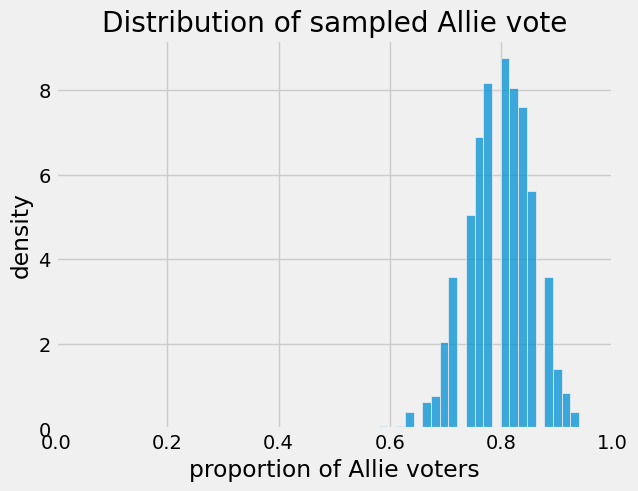

In [70]:
sns.histplot(samples, stat="density")
plt.xlim(0.0, 1.0)
plt.xlabel("proportion of Allie voters")
plt.ylabel("density")
plt.title("Distribution of sampled Allie vote")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

### Question 2c

According to Jacob's 50-person sample, 22\% of his discussion section reported that they would vote for Allie in the end-of-semester contest.

In the cell below, create a plot using any `seaborn` and/or `matplotlib.pyplot` functions of your choice to visualize Jacob's sample statistic superimposed on the simulated sample distribution you plotted in the previous part. In other words, include
- a vertical line that passes through 22\%, 
- a vertical line that passes through the mean of the simulated sample distribution, and 
- the simulated sample distribution itself. 

You should choose contrasting colors and include a descriptive title, labels, and a legend if needed. An example is included below.

<img src='images/q2c.png' width="500px" />

**Hint:** use `plt.axvline(x)` [(documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) to draw vertical lines.

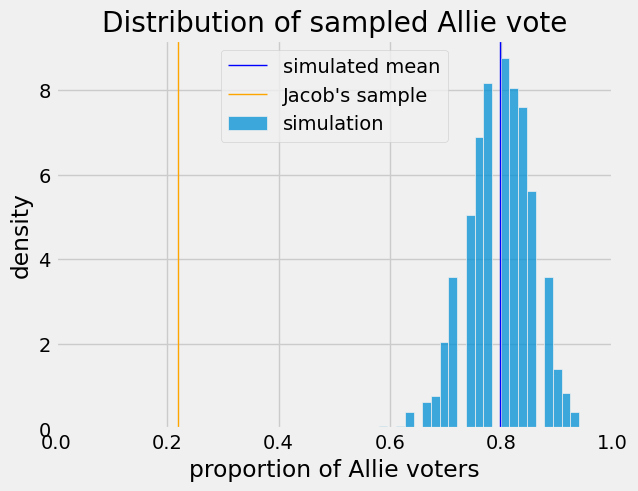

In [71]:
plt.xlim(0.0, 1.0)
plt.axvline(samples.mean(), c="blue", label="simulated mean", linewidth=1)
plt.axvline(0.22, c="orange", label="Jacob's sample", linewidth=1)
sns.histplot(samples, stat="density", label="simulation")
plt.xlabel("proportion of Allie voters")
plt.ylabel("density")
plt.title("Distribution of sampled Allie vote")
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

### Question 2d

Based on your analysis above, could Jacob's result have arisen due to chance alone? If not, what could be a potential source of bias?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 6A!

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://forms.gle/owfPCGgnrju1xQEA9). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see one cell. Running this will automatically generate a zip file with your answers. Please submit this file to the Homework 6A Coding assignment on Gradescope. Gradescope will automatically submit the PDF from this file to the Homework 6A Written assignment. **There is no need to manually submit Homework 6A Written answers; however, please check that the PDF was generated and submitted correctly**. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

You are responsible for submitting the zip file generated below as well as a PDF with your answers to Homework 6B. Here are the different components for this homework and the respective submission processes:
* **Homework 6A Coding**: Submit your Jupyter Notebook zip file for Homework 6A,
which can be generated and downloaded from DataHub by using the `grader.export()`
cell provided below.
* **Homework 6A Written**: Gradescope will automatically submit the PDF from the zip file submitted earlier. You do not need to submit anything to this assignment yourself, but please check that the submission went through properly.  
* **Homework 6B**: Submit a PDF to Gradescope that contains your answers to all questions in Homework 6B.

**Important**: When submitting Homework 6B on Gradescope, you **must tag pages to each question correctly** (it prompts you to do this after submitting your work). This significantly streamlines the grading process for our readers. Failure to do this may result in a score of 0 for untagged questions.

To receive credit on this assignment, **you must submit both your coding and written
portions to their respective Gradescope portals.** 

**You are responsible for ensuring your submission follows our requirements and that the automatic submission for Homework 6A Written answers went through properly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [72]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1ai results: All test cases passed!

    q1aii results: All test cases passed!

    q1aiii results: All test cases passed!

    q1bi results: All test cases passed!

    q1bii results: All test cases passed!

    q1biii results: All test cases passed!

    q1biv results: All test cases passed!

    q2a results: All test cases passed!
